

# <a href='https://github.com/datamllab/rlcard'> <center> <img src='https://miro.medium.com/max/1000/1*_9abDpNTM9Cbsd2HEXYm9Q.png' width=500 class='center' /></a> 

## **Training CFR on Limit Hold'em**
In this tutorial, we will showcase a more advanced algorithm CFR, which uses `step` and `step_back` to traverse the game tree.

First, we install RLcard and PyTorch.

In [1]:
!pip3 install rlcard[torch]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import rlcard
from rlcard.agents import (
    CFRAgent,
    RandomAgent,
)
from rlcard.utils import (
    tournament,
    Logger,
    plot_curve,
)

We make two environments, where one allows `step_back` so that CFR can traverse the tree, and the other for evaluation only.

In [3]:
env = rlcard.make(
        'limit-holdem',
        config={
            'allow_step_back': True,
            'seed': 0,
        }
    )
eval_env = rlcard.make(
    'limit-holdem',
)

In [4]:
print(env.num_players)
print(env.num_actions)
print(env.state_shape)

2
4
[[72], [72]]


We create the CFR agent.

In [5]:
agent1 = CFRAgent(
    env,
    "experiments/limit_holdem_cfr_result/cfr_model",
)

agent2 = CFRAgent(
    env,
    "experiments/limit_holdem_cfr_result/cfr_model",
)

Here, we save the trained model in the path `experiments/leduc_holdem_cfr_result/cfr_model`. Then we use a random agent as the opponent.

In [6]:
eval_env.set_agents([agent1, agent2])

Now we start training for `1000` iterations, i.e., 1000 games.

In [7]:
with Logger("experiments/limit_holdem_cfr_result") as logger:
    for episode in range(10):
        agent1.train()
        agent2.train()
        print('\rIteration {}'.format(episode), end='')

        # Evaluate the performance. Play with agents.
        logger.log_performance(
            env.timestep,
            tournament(
                eval_env,
                10000,
            )
        )

    # Get the paths
    csv_path, fig_path = logger.csv_path, logger.fig_path

Iteration 0
----------------------------------------
  episode      |  91840
  reward       |  [0.02335, -0.02335]
----------------------------------------
Iteration 1
----------------------------------------
  episode      |  183680
  reward       |  [0.0378, -0.0378]
----------------------------------------
Iteration 2
----------------------------------------
  episode      |  275520
  reward       |  [-0.0093, 0.0093]
----------------------------------------
Iteration 3
----------------------------------------
  episode      |  367360
  reward       |  [0.0132, -0.0132]
----------------------------------------
Iteration 4
----------------------------------------
  episode      |  459200
  reward       |  [0.0152, -0.0152]
----------------------------------------
Iteration 5
----------------------------------------
  episode      |  551040
  reward       |  [-0.01765, 0.01765]
----------------------------------------
Iteration 6
----------------------------------------
  episode     

In [14]:
agent = CFRAgent(
    env,
    "experiments/limit_holdem_cfr_result/cfr_model/",
)

In [15]:
eval_env.set_agents([
    agent,
    RandomAgent(num_actions=env.num_actions),
])

In [19]:
with Logger("experiments/limit_holdem_cfr_result") as logger:
    for episode in range(10):
        agent.train()
        print('\rIteration {}'.format(episode), end='')
       
        # Evaluate the performance. Play with Random agents.
        # if episode % 50 == 0:
        logger.log_performance(
            env.timestep,
            tournament(
                eval_env,
                10000,
            )[0]
        )

    # Get the paths
    csv_path, fig_path = logger.csv_path, logger.fig_path

Iteration 0
----------------------------------------
  episode      |  1140715
  reward       |  0.01835
----------------------------------------
Iteration 1
----------------------------------------
  episode      |  1186635
  reward       |  0.01975
----------------------------------------
Iteration 2
----------------------------------------
  episode      |  1232555
  reward       |  0.0431
----------------------------------------
Iteration 3
----------------------------------------
  episode      |  1278475
  reward       |  -0.01825
----------------------------------------
Iteration 4
----------------------------------------
  episode      |  1324395
  reward       |  0.00055
----------------------------------------
Iteration 5
----------------------------------------
  episode      |  1370315
  reward       |  0.0357
----------------------------------------
Iteration 6
----------------------------------------
  episode      |  1416235
  reward       |  -0.0064
--------------------

We can plot the learning curve

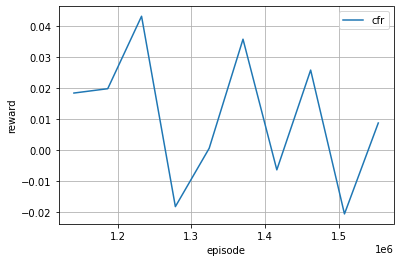

In [20]:
plot_curve(csv_path, fig_path, 'cfr')

In [22]:
trajectories, payoffs = eval_env.run(is_training=False)
trajectories

[[{'legal_actions': OrderedDict([(1, None), (2, None), (3, None)]),
   'obs': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
          0., 0., 0., 0.]),
   'raw_obs': {'hand': ['ST', 'D2'],
    'public_cards': [],
    'all_chips': [2, 2],
    'my_chips': 2,
    'legal_actions': ['raise', 'fold', 'check'],
    'raise_nums': [1, 0, 0, 0]},
   'raw_legal_actions': ['raise', 'fold', 'check'],
   'action_record': [(1, 'call'), (0, 'raise'), (1, 'call'), (0, 'fold')]},
  1,
  {'legal_actions': OrderedDict([(1, None), (2, None), (3, None)]),
   'obs': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 1., 

In [23]:
env.get_perfect_information()

{'chips': [2, 1],
 'public_card': None,
 'hand_cards': [['D9', 'CA'], ['DA', 'DT']],
 'current_player': 1,
 'legal_actions': ['call', 'raise', 'fold']}

Good job! Now you have your trained CFR agent on Limit Hold'em!